In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reads csv files in the folder My Drive/DA Bootcamp/_DA-project_/datasets/
bus = pd.read_csv('../datasets/bus_stops.csv') #My Drive/DA Bootcamp/_DA-project_/datasets/population.csv
# copy of the df before making any changes
raw_bus = bus.copy()

In [3]:
bus

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià
...,...,...,...,...,...,...,...
3157,K014,Day bus stop,2.183887,41.422024,BUS -191--,Sant Andreu,el Congrés i els Indians
3158,K014,Day bus stop,2.176710,41.446419,BUS -127-81--,Nou Barris,les Roquetes
3159,K015,Night bus stop,2.144596,41.411446,NITBUS -N4--,Gràcia,Vallcarca i els Penitents
3160,K014,Day bus stop,2.142256,41.371176,BUS -91-115-V5--,Sants-Montjuïc,la Bordeta


In [4]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               3162 non-null   object 
 1   Transport          3162 non-null   object 
 2   Longitude          3162 non-null   float64
 3   Latitude           3162 non-null   float64
 4   Bus.Stop           3162 non-null   object 
 5   District.Name      3146 non-null   object 
 6   Neighborhood.Name  3146 non-null   object 
dtypes: float64(2), object(5)
memory usage: 173.1+ KB


In [6]:
bus.duplicated().sum()

np.int64(0)

In [7]:
bus = raw_bus.dropna(inplace=False)
bus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3146 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Code               3146 non-null   object 
 1   Transport          3146 non-null   object 
 2   Longitude          3146 non-null   float64
 3   Latitude           3146 non-null   float64
 4   Bus.Stop           3146 non-null   object 
 5   District.Name      3146 non-null   object 
 6   Neighborhood.Name  3146 non-null   object 
dtypes: float64(2), object(5)
memory usage: 196.6+ KB


In [8]:
bus.drop(columns=['Code', 'Longitude', 'Latitude', 'Bus.Stop'], inplace=True)
bus

,Transport,District.Name,Neighborhood.Name
0,Day bus stop,Horta-Guinardó,el Guinardó
1,Day bus stop,Gràcia,Vallcarca i els Penitents
2,Day bus stop,Horta-Guinardó,la Font d'en Fargues
3,Day bus stop,Horta-Guinardó,la Font d'en Fargues
4,Day bus stop,Sarrià-Sant Gervasi,Sarrià
...,...,...,...
3157,Day bus stop,Sant Andreu,el Congrés i els Indians
3158,Day bus stop,Nou Barris,les Roquetes
3159,Night bus stop,Gràcia,Vallcarca i els Penitents
3160,Day bus stop,Sants-Montjuïc,la Bordeta


In [18]:
bus['Transport'].unique()

array(['Airport bus stop', 'Bus station', 'Day bus stop',
       'Night bus stop'], dtype=object)

In [21]:
bus['Transport'].value_counts()

Transport
Day bus stop        73
Night bus stop      72
Airport bus stop     4
Bus station          3
Name: count, dtype: int64

In [22]:
bus[bus['Transport']=='Bus station']

,Transport,District.Name,Neighborhood.Name,Stops.Count
4,Bus station,Eixample,el Fort Pienc,1
5,Bus station,Sant Andreu,Sant Andreu,1
6,Bus station,Sants-Montjuïc,Hostafrancs,1


In [9]:
bus=bus.groupby(['Transport', 'District.Name', 'Neighborhood.Name'])['Transport'].size().reset_index(name='Stops.Count')
bus

,Transport,District.Name,Neighborhood.Name,Stops.Count
0,Airport bus stop,Eixample,Sant Antoni,3
1,Airport bus stop,Eixample,la Dreta de l'Eixample,2
2,Airport bus stop,Sants-Montjuïc,Hostafrancs,1
3,Airport bus stop,Sants-Montjuïc,el Poble-sec,1
4,Bus station,Eixample,el Fort Pienc,1
...,...,...,...,...
147,Night bus stop,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,14
148,Night bus stop,Sarrià-Sant Gervasi,Sarrià,22
149,Night bus stop,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",8
150,Night bus stop,Sarrià-Sant Gervasi,el Putxet i el Farró,20


In [10]:
bus_distr_pivoted = bus.pivot_table(index='District.Name', columns='Transport', 
                                                             values='Stops.Count', 
                                                             aggfunc ='sum', fill_value=0)
bus_distr_pivoted

Transport,Airport bus stop,Bus station,Day bus stop,Night bus stop
District.Name,,,,
Ciutat Vella,0,0,114,53
Eixample,5,1,245,154
Gràcia,0,0,166,44
Horta-Guinardó,0,0,309,80
Les Corts,0,0,162,45
Nou Barris,0,0,254,76
Sant Andreu,0,1,161,66
Sant Martí,0,0,235,121
Sants-Montjuïc,2,1,334,78


In [13]:
bus_pivoted = bus.pivot_table(index=['District.Name','Neighborhood.Name'], columns='Transport', 
                                                             values='Stops.Count', 
                                                             aggfunc ='sum', fill_value=0)
bus_pivoted

Transport                                                  Airport bus stop  \
District.Name       Neighborhood.Name                                         
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera                 0   
                    el Barri Gòtic                                        0   
                    el Raval                                              0   
                    la Barceloneta                                        0   
Eixample            Sant Antoni                                           3   
...                                                                     ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova                            0   
                    Sarrià                                                0   
                    Vallvidrera, el Tibidabo i les Planes                 0   
                    el Putxet i el Farró                                  0   
                    les Tres Torres                                       0   

Transport                                                  Bus station  \
District.Name       Neighborhood.Name                                    
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera            0   
                    el Barri Gòtic                                   0   
                    el Raval                                         0   
                    la Barceloneta                                   0   
Eixample            Sant Antoni                                      0   
...                                                                ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova                       0   
                    Sarrià                                           0   
                    Vallvidrera, el Tibidabo i les Planes            0   
                    el Putxet i el Farró                             0   
                    les Tres Torres                                  0   

Transport                                                  Day bus stop  \
District.Name       Neighborhood.Name                                     
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera            26   
                    el Barri Gòtic                                   23   
                    el Raval                                         31   
                    la Barceloneta                                   34   
Eixample            Sant Antoni                                      39   
...                                                                 ...   
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova                       69   
                    Sarrià                                           58   
                    Vallvidrera, el Tibidabo i les Planes           110   
                    el Putxet i el Farró                             34   
                    les Tres Torres                                  21   

Transport                                                  Night bus stop  
District.Name       Neighborhood.Name                                      
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera              12  
                    el Barri Gòtic                                     16  
                    el Raval                                           11  
                    la Barceloneta                                     14  
Eixample            Sant Antoni                                        14  
...                                                                   ...  
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova                         14  
                    Sarrià                                             22  
                    Vallvidrera, el Tibidabo i les Planes               8  
                    el Putxet i el Farró                               20  
                    les Tres Torres                                     9  

[73 rows x 4 columns]

In [16]:
bus_pivoted2 = bus_pivoted.reset_index()
bus_pivoted2

Transport,District.Name,Neighborhood.Name,Airport bus stop,Bus station,Day bus stop,Night bus stop
0,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",0,0,26,12
1,Ciutat Vella,el Barri Gòtic,0,0,23,16
2,Ciutat Vella,el Raval,0,0,31,11
3,Ciutat Vella,la Barceloneta,0,0,34,14
4,Eixample,Sant Antoni,3,0,39,14
...,...,...,...,...,...,...
68,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,0,0,69,14
69,Sarrià-Sant Gervasi,Sarrià,0,0,58,22
70,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",0,0,110,8
71,Sarrià-Sant Gervasi,el Putxet i el Farró,0,0,34,20


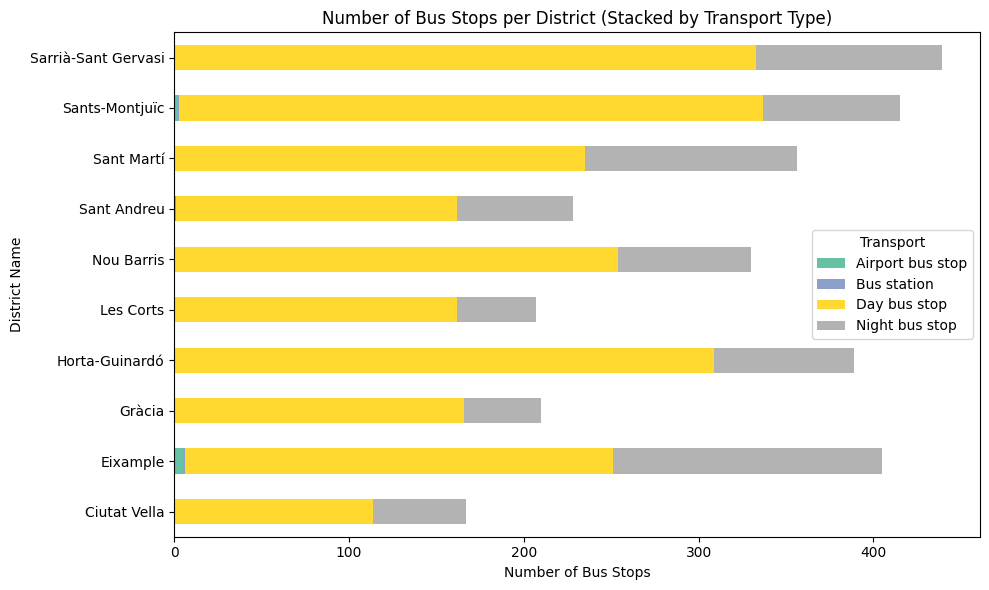

In [24]:
# Plotting the stacked bar plot
bus_distr_pivoted.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')

# Adding titles and labels
plt.title('Number of Bus Stops per District (Stacked by Transport Type)')
plt.xlabel('Number of Bus Stops')
plt.ylabel('District Name')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()